# reliant webscrape

In [2]:
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.support.ui import Select
from selenium.webdriver.common.keys import Keys
import selenium.webdriver.support.ui as ui
import selenium.webdriver as webdriver
from selenium.webdriver import Chrome
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import reliant_scrape as rs
import pandas as pd
import numpy as np
import selenium
import html5lib
import time
import yaml
import json
import os

print('imported modules.')

imported modules.


## initialize browser

In [3]:
with open('config.yaml', 'r') as f:
    config = yaml.load(f, Loader = yaml.FullLoader)

output = rs.logon(config['headless'], config['download'], config['site'], config['creds'])
print('logged on successfully.')

time.sleep(10)

logged on successfully.


## scrape user info

In [4]:
amt, name, acct, address = rs.acct_info(output)

print('current bill is ${}.'.format(amt))
print('service for {}, account {} at {}.'.format(name, acct, address))

current bill is $0.0.
service for STEVEN HURWITT, account 17123855-3 at 2512 MILAM ST #5218, HOUSTON, TX 77006.


## view usage history

In [5]:
want_to = output.find_element_by_xpath("//select[@id='wantTo']")
options = [x for x in want_to.find_elements_by_tag_name('option')]
options_text = [x.text for x in want_to.find_elements_by_tag_name('option')]

Select(want_to).select_by_visible_text('View usage history')
time.sleep(5)

## get daily usage data

In [6]:
master = pd.DataFrame()

data, date, var = rs.get_daily_use(output)
start_date = date

try:
    var.find_element_by_id('nextid').click() #click to next day
    time.sleep(2)

except:
    print('out of days.')

while start_date < datetime.today():
    
    time.sleep(5)
    data, date, var = rs.get_daily_use(output)
    start_date += timedelta(days = 1)
    
    if data.shape[0] > 0:
        master = pd.concat([master, data], axis = 0)
    
    try:
        var.find_element_by_id('nextid').click() #click to next day
        time.sleep(2)

    except:
        print('out of days.')

September 13, 2020 had usage of 42.0 kWh and cost $5.04.
September 14, 2020 had usage of 52.8 kWh and cost $6.35.
September 15, 2020 had usage of 49.9 kWh and cost $6.05.
September 16, 2020 had usage of 0 kWh and cost $0.
out of days.
September 16, 2020 had usage of 0 kWh and cost $0.
out of days.
September 16, 2020 had usage of 0 kWh and cost $0.
out of days.


In [16]:
base = os.getcwd()
date_string = datetime.strftime(datetime.today(), format = '%m%d%Y')
fname = 'daily_use_' + date_string + '.csv'
filepath = os.path.join(base, 'data', fname)
filepath
master.to_csv(fname)
print('wrote data to .csv')

'C:\\Users\\steve\\Documents\\reliant-scrape\\data\\daily_use_08272020.csv'

<AxesSubplot:xlabel='Date'>

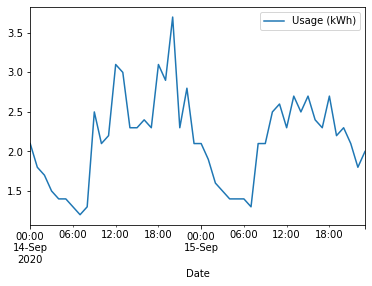

In [7]:
master.plot(y = 'Usage (kWh)')

In [10]:
master['Date'] = master.index
master = master[['Date', 'Usage (kWh)', 'Cost ($)', 'Hi', 'Low']]
master

,Date,Usage (kWh),Cost ($),Hi,Low
Date,,,,,
2020-09-14 00:00:00,2020-09-14 00:00:00,2.1,0.25,89,79
2020-09-14 01:00:00,2020-09-14 01:00:00,1.8,0.22,89,79
2020-09-14 02:00:00,2020-09-14 02:00:00,1.7,0.20,89,79
2020-09-14 03:00:00,2020-09-14 03:00:00,1.5,0.18,89,79
2020-09-14 04:00:00,2020-09-14 04:00:00,1.4,0.17,89,79
2020-09-14 05:00:00,2020-09-14 05:00:00,1.4,0.17,89,79
2020-09-14 06:00:00,2020-09-14 06:00:00,1.3,0.15,89,79
2020-09-14 07:00:00,2020-09-14 07:00:00,1.2,0.15,89,79
2020-09-14 08:00:00,2020-09-14 08:00:00,1.3,0.15,89,79


## make a payment

In [45]:
Select(want_to).select_by_visible_text('Make a payment')
time.sleep(5)

output

<selenium.webdriver.chrome.webdriver.WebDriver (session="118ddc9ef19bae7a24fef13352590ef2")>

In [40]:
soup = BeautifulSoup(due, 'html5lib')
soup.find_all('div', {'class' : 'resp-col-12-sm resp-col-12 left'})

TypeError: object of type 'WebElement' has no len()